In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Sales_data_zone_wise.csv')
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [5]:
df=pd.DataFrame(data)

In [6]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [7]:
df_new= df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']]

# The mean sales generated by each zone.

In [8]:
df_new.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

<AxesSubplot:>

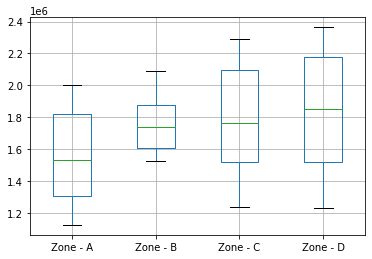

In [9]:
df_new.boxplot()

Zone-D has the highest mean sales among the four zones

# Total sales generated by all the zones for each month.

In [10]:
df1 =df.set_index('Month').sum(axis = 1,numeric_only=True)
df1

Month
Month - 1     7022544
Month - 2     7152303
Month - 3     6475939
Month - 4     8174449
Month - 5     5995328
Month - 6     7151387
Month - 7     7287108
Month - 8     7816299
Month - 9     6703395
Month - 10    7128210
Month - 11    7032783
Month - 12    6111084
Month - 13    5925424
Month - 14    7155515
Month - 15    5934156
Month - 16    6506659
Month - 17    7149383
Month - 18    7083490
Month - 19    6971953
Month - 20    7124599
Month - 21    7389597
Month - 22    7560001
Month - 23    6687919
Month - 24    7784747
Month - 25    6095918
Month - 26    6512360
Month - 27    6267918
Month - 28    7470920
Month - 29    6772277
dtype: int64

<AxesSubplot:xlabel='Month'>

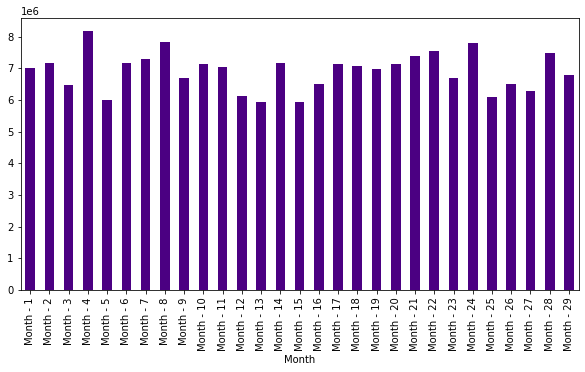

In [11]:
df1.plot(kind='bar',figsize=(10,5),color='indigo')

From above analysis, Month-4 has the highest total sales



# Check whether all the zones generate the same amount of sales using ANOVA Test

In [12]:
#Ho: all the zones generate the same amount of sales
#Ha: all zones generate different amount of sales

In [13]:
from scipy.stats import f_oneway

In [14]:
statistics,pvalue = f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'],data['Zone - D'])
alpha = 0.05
print("The p value is",pvalue)

The p value is 0.0011827601694503335


In [15]:
if pvalue > alpha:
    print("Fail to reject the Null Hypothesis")
else:
    print ("Reject the Null Hypothesis")

Reject the Null Hypothesis


Acc to analysis since p value < alpha, we reject the null hypothesis which implies that ALL ZONES GENERATE DIFFERENT AMOUNT OF SALES